<a href="https://colab.research.google.com/github/Rohan5076/machine-learning/blob/main/ML_14_Basic_Ensemble_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
When you want to purchase a new car, will you walk up to the first car shop and purchase one based on the advice of the dealer? It’s highly unlikely.

You would likely browser a few web portals where people have posted their reviews and compare different car models, checking for their features and prices. You will also probably ask your friends and colleagues for their opinion. In short, you wouldn’t directly reach a conclusion, but will instead make a decision considering the opinions of other people as well.

Ensemble models in machine learning operate on a similar idea. They combine the decisions from multiple models to improve the overall performance. This can be achieved in various ways, which we will discover in this article.



# Table of Contents
Introduction to Ensemble Learning

### Basic Ensemble Techniques

2.1 Max Voting

2.2 Averaging

2.3 Weighted Average

### Advanced Ensemble Techniques
3.1 Stacking

3.2 Blending

3.3 Bagging

3.4 Boosting

### Algorithms based on Bagging and Boosting
4.1 Bagging meta-estimator

4.2 Random Forest

4.3 AdaBoost

4.4 GBM

4.5 XGB

4.6 Light GBM

4.7 CatBoost
 

# 1. Introduction to Ensemble Learning
Let’s understand the concept of ensemble learning with an example. Suppose you are a movie director and you have created a short movie on a very important and interesting topic. Now, you want to take preliminary feedback (ratings) on the movie before making it public. What are the possible ways by which you can do that?

A: You may ask one of your friends to rate the movie for you.
Now it’s entirely possible that the person you have chosen loves you very much and doesn’t want to break your heart by providing a 1-star rating to the horrible work you have created.

B: Another way could be by asking 5 colleagues of yours to rate the movie.
This should provide a better idea of the movie. This method may provide honest ratings for your movie. But a problem still exists. These 5 people may not be “Subject Matter Experts” on the topic of your movie. Sure, they might understand the cinematography, the shots, or the audio, but at the same time may not be the best judges of dark humour.

C: How about asking 50 people to rate the movie?
Some of which can be your friends, some of them can be your colleagues and some may even be total strangers.

The responses, in this case, would be more generalized and diversified since now you have people with different sets of skills. And as it turns out – this is a better approach to get honest ratings than the previous cases we saw.

With these examples, you can infer that a diverse group of people are likely to make better decisions as compared to individuals. Similar is true for a diverse set of models in comparison to single models. This diversification in Machine Learning is achieved by a technique called Ensemble Learning.

Now that you have got a gist of what ensemble learning is – let us look at the various techniques in ensemble learning along with their implementations.



# 2. Simple Ensemble Techniques
In this section, we will look at a few simple but powerful techniques, namely:

2.1 Max Voting

2.2 Averaging

2.3 Weighted Averaging

## 2.1 Max Voting
The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

For example, when you asked 5 of your colleagues to rate your movie (out of 5); we’ll assume three of them rated it as 4 while two of them gave it a 5. Since the majority gave a rating of 4, the final rating will be taken as 4. You can consider this as taking the mode of all the predictions.

The result of max voting would be something like this:

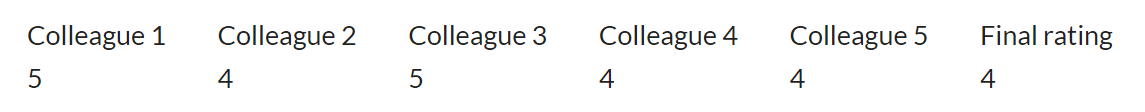

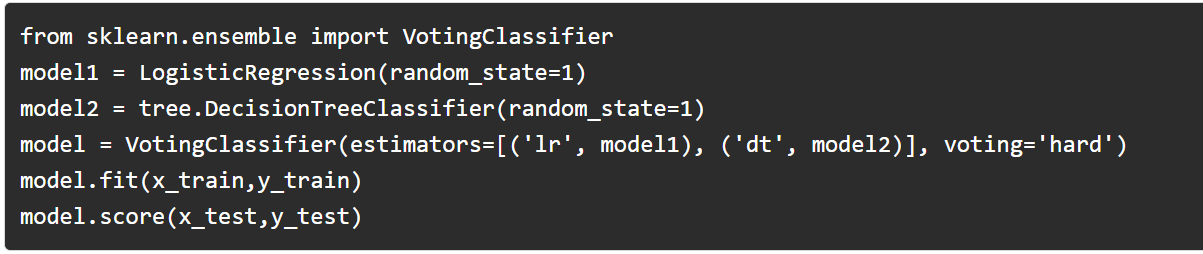

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
#loading the data set
df = pd.read_csv("/content/drive/MyDrive/All CSV files-20220711T101939Z-001/All CSV files/wheatseeds.csv")
df.head()

Area  Parameter  Compactness  Length of kernel  Width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Aymmetery coefficient  length kernel groove  class(1,2,3)  
0                  2.221                 5.220             1  
1                  1.018                 4.956             1  
2                  2.699                 4.825             1  
3                  2.259                 4.805             1  
4                  1.355                 5.175             1

In [82]:
x_train, x_test, y_train, y_test = train_test_split(
	df.iloc[:, :-1], df.iloc[:, -1],
	test_size = 0.25)

In [83]:
x=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
# copy the data
x_max_scaled = x.copy()
  
# apply normalization techniques
for column in x_max_scaled.columns:
    x_max_scaled[column] = x_max_scaled[column]  / x_max_scaled[column].abs().max()
      
# view normalized data
display(x_max_scaled)
x=x_max_scaled

Area  Parameter  Compactness  Length of kernel  Width of kernel  \
0    0.720491   0.860290     0.948492          0.863371         0.821225   
1    0.702550   0.844638     0.959490          0.832060         0.826432   
2    0.674693   0.816812     0.985517          0.792659         0.827424   
3    0.653447   0.808116     0.975172          0.797603         0.837838   
4    0.762040   0.868986     0.983774          0.847640         0.883213   
..        ...        ...          ...               ...              ...   
205  0.575543   0.765217     0.956441          0.769588         0.739152   
206  0.530217   0.746667     0.926821          0.770037         0.693032   
207  0.623229   0.791884     0.967331          0.784419         0.801389   
208  0.559018   0.765797     0.927910          0.775281         0.703199   
209  0.580737   0.773333     0.945660          0.785468         0.737416   

     Aymmetery coefficient  length kernel groove  
0                 0.262654              0.796947  
1                 0.120388              0.756641  
2                 0.319182              0.736641  
3                 0.267148              0.733588  
4                 0.160241              0.790076  
..                     ...                   ...  
205               0.429399              0.743511  
206               0.511471              0.763817  
207               0.983325              0.771908  
208               0.425497              0.770076  
209               0.666627              0.772977  

[210 rows x 7 columns]

In [92]:
x_train, x_test=train_test_split(x,test_size = 0.25)

In [93]:
y_train, y_test=train_test_split(y,test_size = 0.25)

In [94]:
x

Area  Parameter  Compactness  Length of kernel  Width of kernel  \
0    0.720491   0.860290     0.948492          0.863371         0.821225   
1    0.702550   0.844638     0.959490          0.832060         0.826432   
2    0.674693   0.816812     0.985517          0.792659         0.827424   
3    0.653447   0.808116     0.975172          0.797603         0.837838   
4    0.762040   0.868986     0.983774          0.847640         0.883213   
..        ...        ...          ...               ...              ...   
205  0.575543   0.765217     0.956441          0.769588         0.739152   
206  0.530217   0.746667     0.926821          0.770037         0.693032   
207  0.623229   0.791884     0.967331          0.784419         0.801389   
208  0.559018   0.765797     0.927910          0.775281         0.703199   
209  0.580737   0.773333     0.945660          0.785468         0.737416   

     Aymmetery coefficient  length kernel groove  
0                 0.262654              0.796947  
1                 0.120388              0.756641  
2                 0.319182              0.736641  
3                 0.267148              0.733588  
4                 0.160241              0.790076  
..                     ...                   ...  
205               0.429399              0.743511  
206               0.511471              0.763817  
207               0.983325              0.771908  
208               0.425497              0.770076  
209               0.666627              0.772977  

[210 rows x 7 columns]

In [95]:
from sklearn.ensemble import VotingClassifier
model1 =LogisticRegression(random_state=1)
model2 =tree.DecisionTreeClassifier(random_state=1)
model =VotingClassifier(estimators=[('lr',model1),('dt',model2)],voting='hard')
model.fit(x_test,y_test)
model.score(x_test,y_test)

1.0

## 2.2 Averaging
Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

For example, in the below case, the averaging method would take the average of all the values.

i.e. (5+4+5+4+4)/5 = 4.4

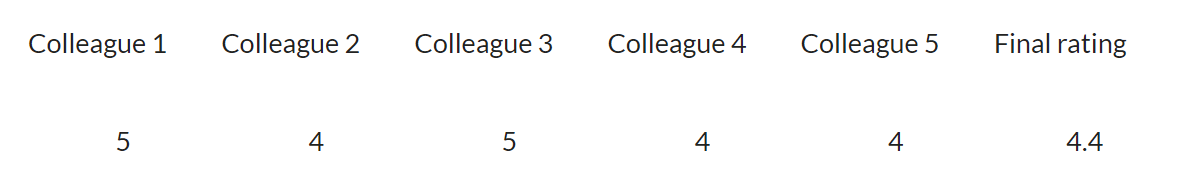

Sample Code:

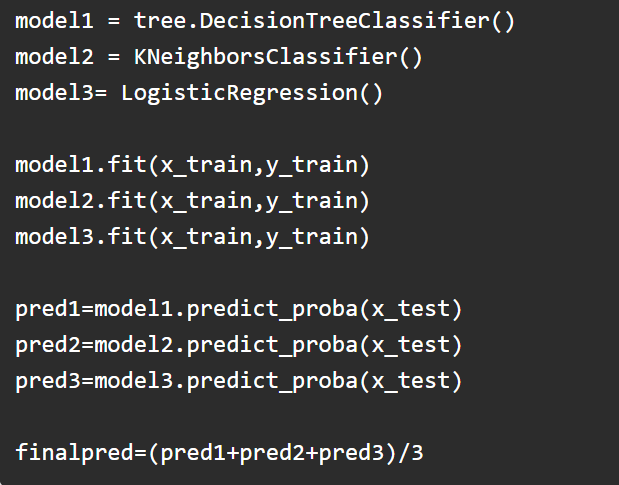

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [97]:
df.columns

Index(['Area', 'Parameter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Aymmetery coefficient', 'length kernel groove',
       'class(1,2,3)'],
      dtype='object')

In [98]:
df

Area  Parameter  Compactness  Length of kernel  Width of kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
..     ...        ...          ...               ...              ...   
205  12.19      13.20       0.8783             5.137            2.981   
206  11.23      12.88       0.8511             5.140            2.795   
207  13.20      13.66       0.8883             5.236            3.232   
208  11.84      13.21       0.8521             5.175            2.836   
209  12.30      13.34       0.8684             5.243            2.974   

     Aymmetery coefficient  length kernel groove  class(1,2,3)  
0                    2.221                 5.220             1  
1                    1.018                 4.956             1  
2                    2.699                 4.825             1  
3                    2.259                 4.805             1  
4                    1.355                 5.175             1  
..                     ...                   ...           ...  
205                  3.631                 4.870             3  
206                  4.325                 5.003             3  
207                  8.315                 5.056             3  
208                  3.598                 5.044             3  
209                  5.637                 5.063             3  

[210 rows x 8 columns]

In [99]:


model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3=LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1+pred2+pred3)/3
print('The Finalpred is :\n',finalpred)

The Finalpred is :
 [[0.31592351 0.1896223  0.49445419]
 [0.17411668 0.58956576 0.23631756]
 [0.56513641 0.24663752 0.18822607]
 [0.12019966 0.5901671  0.28963324]
 [0.18543711 0.64703585 0.16752704]
 [0.1091644  0.58940502 0.30143058]
 [0.50676462 0.24450517 0.24873021]
 [0.63106533 0.11699538 0.25193928]
 [0.23124878 0.10963985 0.65911136]
 [0.17205101 0.3083211  0.51962789]
 [0.50394891 0.24918825 0.24686284]
 [0.58355492 0.25822572 0.15821936]
 [0.63000764 0.18512197 0.18487039]
 [0.2421191  0.57354115 0.18433974]
 [0.23467468 0.58326681 0.1820585 ]
 [0.09933649 0.30568573 0.59497778]
 [0.50241461 0.32474196 0.17284343]
 [0.50314162 0.24139664 0.25546174]
 [0.60099716 0.32066929 0.07833355]
 [0.65965886 0.25711843 0.08322271]
 [0.16642216 0.5072876  0.32629024]
 [0.12498735 0.52175956 0.35325309]
 [0.33914346 0.58457699 0.07627955]
 [0.59506829 0.1895894  0.21534231]
 [0.40105772 0.11452042 0.48442185]
 [0.31449637 0.5213622  0.16414143]
 [0.5108554  0.24217773 0.24696687]
 [0.1675

## 2.3 Weighted Average
This is an extension of the averaging method. All models are assigned different weights defining the importance of each model for prediction. For instance, if two of your colleagues are critics, while others have no prior experience in this field, then the answers by these two friends are given more importance as compared to the other people.

The result is calculated as [(5*0.23) + (4*0.23) + (5*0.18) + (4*0.18) + (4*0.18)] = 4.41.

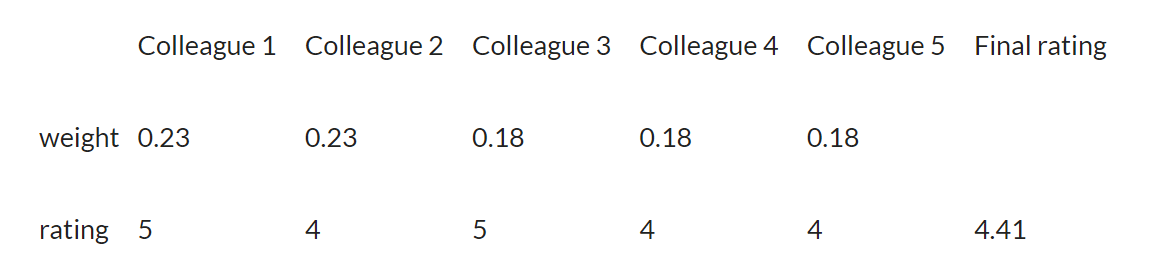

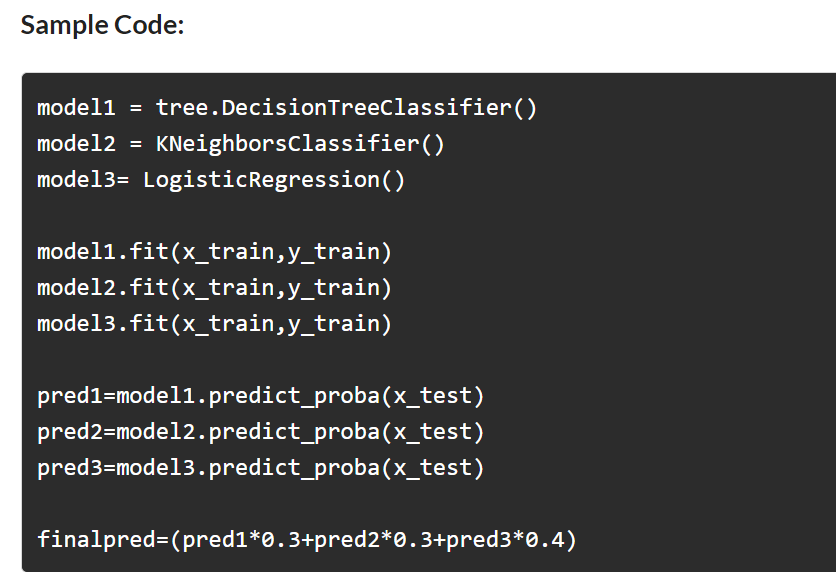

In [108]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1 = model1.predict_proba(x_test)
pred2 = model2.predict_proba(x_test)
prad3 = model3.predict_proba(x_test)

finalpred = (pred1*0.325 + pred2*0.325 + pred3*0.35)
print('The Finalpred is:\n',finalpred)

The Finalpred is:
 [[0.31671969 0.51910341 0.1641769 ]
 [0.17782252 0.58404405 0.23813344]
 [0.55839323 0.2489694  0.19263738]
 [0.12620964 0.58467545 0.2891149 ]
 [0.18970896 0.31438764 0.4959034 ]
 [0.11462262 0.25887527 0.62650211]
 [0.17710285 0.24673043 0.57616672]
 [0.6226186  0.12284515 0.25453625]
 [0.23281122 0.11512185 0.65206693]
 [0.17565356 0.30873715 0.51560928]
 [0.49914635 0.25164766 0.24920599]
 [0.25273267 0.586137   0.16113033]
 [0.62150802 0.18937807 0.18911391]
 [0.24422506 0.56721821 0.18855673]
 [0.23640842 0.57743015 0.18616143]
 [0.10430332 0.30597002 0.58972667]
 [0.49753534 0.32597906 0.17648561]
 [0.4982987  0.24346647 0.25823483]
 [0.59604702 0.32170276 0.08225022]
 [0.6526418  0.25997435 0.08738385]
 [0.16974327 0.50265198 0.32760476]
 [0.13123672 0.51784754 0.35091574]
 [0.34110064 0.57880584 0.08009352]
 [0.5898217  0.19406887 0.21610943]
 [0.40111061 0.12024645 0.47864294]
 [0.31522119 0.19243031 0.4923485 ]
 [0.50639817 0.24428661 0.24931522]
 [0.17097